In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import os
os.chdir('C:/Users/localadmin/Documents/data/1321')

In [4]:
file_list = os.listdir() # file一覧を作成

In [5]:
# ファイル一覧を読み込みひとつのＤａｔａＦｒａｍｅにする
target = pd.DataFrame([])
for i in file_list :
    tmp = pd.read_csv(i,encoding='shift-jis',skiprows=1)
    target = pd.concat([target,tmp],ignore_index=True)

In [6]:
target.head()

,日付,始値,高値,安値,終値,出来高,終値調整値
0,2001-07-13,12490,12490,12300,12310,259430,12310
1,2001-07-16,12400,12400,12250,12330,99740,12330
2,2001-07-17,12170,12170,12100,12120,93150,12120
3,2001-07-18,12150,12150,11830,11840,165330,11840
4,2001-07-19,11990,11990,11860,11920,620220,11920


In [7]:
target.tail()

,日付,始値,高値,安値,終値,出来高,終値調整値
4195,2018-08-21,22580,22770,22520,22700,168314,22700
4196,2018-08-22,22700,22850,22620,22810,80965,22810
4197,2018-08-23,22870,22930,22850,22880,110272,22880
4198,2018-08-24,22950,23070,22910,23060,218600,23060
4199,2018-08-27,23150,23310,23150,23290,262550,23290


In [8]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 7 columns):
日付       4200 non-null object
始値       4200 non-null int64
高値       4200 non-null int64
安値       4200 non-null int64
終値       4200 non-null int64
出来高      4200 non-null int64
終値調整値    4200 non-null int64
dtypes: int64(6), object(1)
memory usage: 229.8+ KB


In [9]:
target.describe()

,始値,高値,安値,終値,出来高,終値調整値
count,4200.000000,4200.000000,4200.000000,4200.000000,4.200000e+03,4200.000000
mean,13712.471429,13797.576190,13619.397619,13709.076190,4.566220e+05,13709.076190
std,4260.690941,4271.692847,4248.019293,4262.204153,3.505115e+05,4262.204153
min,7200.000000,7250.000000,7120.000000,7200.000000,3.111000e+04,7200.000000
25%,10070.000000,10150.000000,10007.500000,10080.000000,2.230695e+05,10080.000000
50%,12305.000000,12360.000000,12210.000000,12290.000000,3.724900e+05,12290.000000
75%,16942.500000,17080.000000,16840.000000,16960.000000,5.790362e+05,16960.000000
max,24770.000000,24800.000000,24580.000000,24790.000000,3.844904e+06,24790.000000


In [10]:
# 文字列になっている日付を日付型データに変換してindexに設定
target.index = pd.to_datetime(target['日付'])

In [11]:
# ローソクチャートを作成するためのライブラリをimport
# import matplotlib.finance as mpf
import mpl_finance as mtf

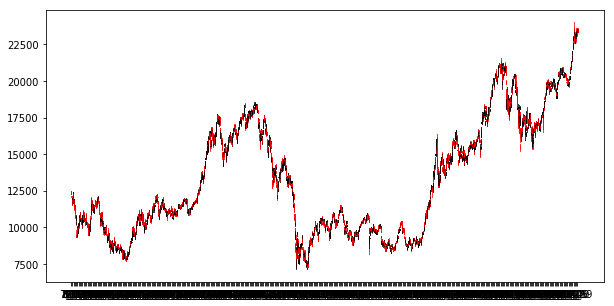

In [12]:
# 作図エリアの設定
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)

# 作図対象データを抽出
tmp = target['2001-7-13':'2017-12-29']

# 描画関数の実行
mtf.candlestick2_ochl(opens=tmp['始値'],
                      closes=tmp['終値'],
                      highs=tmp['高値'],
                      lows=tmp['安値'],
                      ax=ax1,width=0.8,
                      )

# X軸のラベルの設定
labels = np.array([str(x.month)+'／'+str(x.day) for x in tmp.index])  #月と日のデータを取り出して編集
tick = np.arange(0,len(tmp),10)                                       #ラベル10日刻みで出力するためのインデックスを作成
ax1.set_xticks(tick)                                                  #10日刻みにラベルを設定
ax1.set_xticklabels(labels[tick])                                     #上記の設定内容に文字列を付与

plt.show()

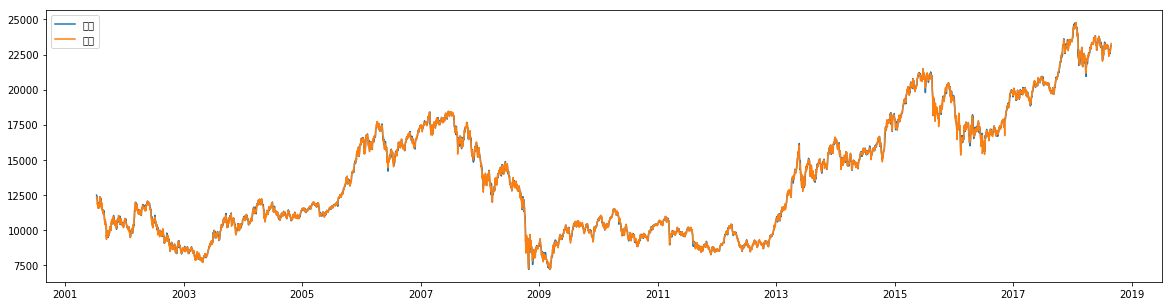

In [13]:
plt.figure(figsize=(20,5))

# 線グラフの描画
plt.plot(target['始値'],label='始値')
plt.plot(target['終値'],label='終値')
# 凡例の出力
plt.legend()

plt.show()

In [14]:
# 陰線と陽線の比率を可視化する

# 始値と終値からＣｌａｓｓを設定する
target['Class'] = 'Even'
target.loc[target['終値']>target['始値'],'Class'] = 'up'
target.loc[target['終値']<target['始値'],'Class'] = 'down'

In [15]:
# 年をキーとして設定する
target['year'] = [x.year for x in target.index]

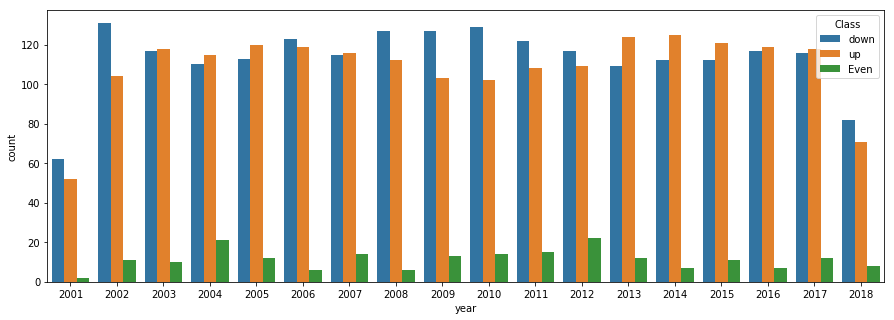

In [16]:
# 各年のクラスを可視化
# sns.set()
plt.figure(figsize=(15,5))
sns.countplot(x='year',data=target,hue='Class',)
plt.show()

In [30]:
# 始値と終値の差異を時系列表示

tmp = target.copy()[['始値','終値']]
tmp['dif'] = tmp['終値']-tmp['始値']
tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4200 entries, 2001-07-13 to 2018-08-27
Data columns (total 3 columns):
始値     4200 non-null int64
終値     4200 non-null int64
dif    4200 non-null int64
dtypes: int64(3)
memory usage: 131.2 KB


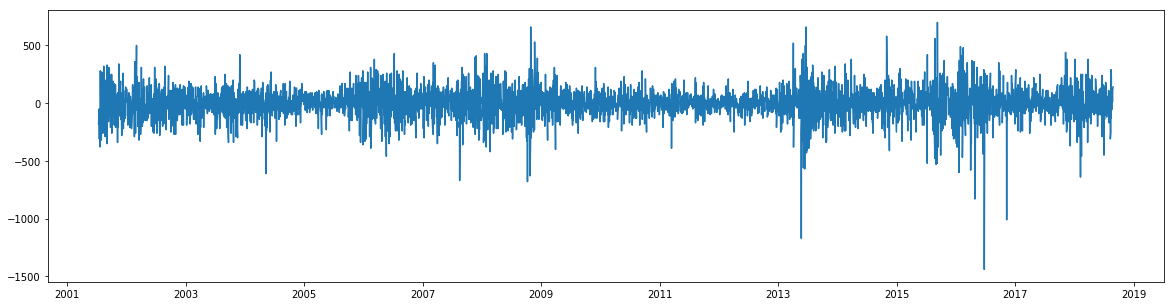

In [18]:
plt.figure(figsize=(20,5))
plt.plot(tmp['dif'])
plt.show()

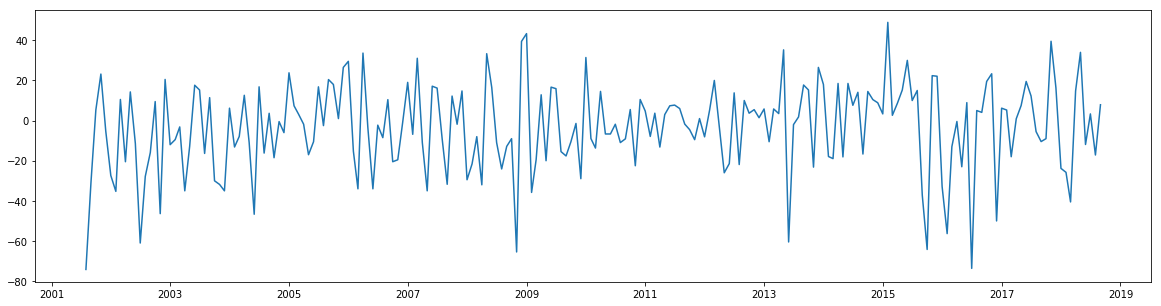

In [19]:
# 差異を月別平均に変換

tmp2 = tmp.resample('M').mean()['dif']

plt.figure(figsize=(20,5))
plt.plot(tmp2)
plt.show()

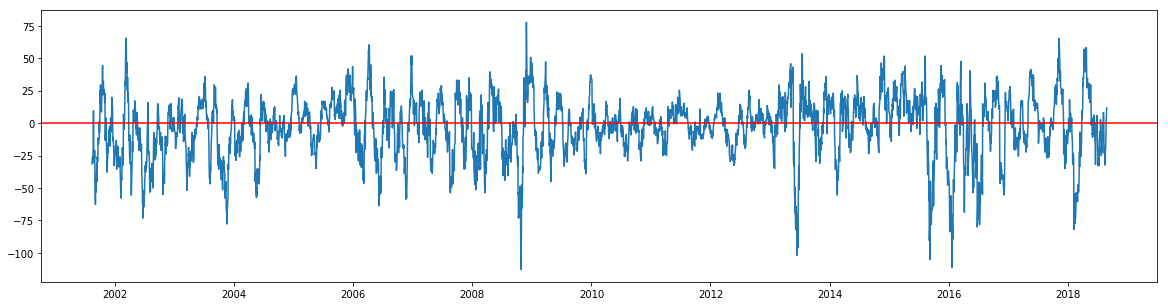

In [20]:
# 差異を22日（おおよそ1ヶ月）の移動平均に変換

tmp2 = tmp.rolling(window=22).mean()['dif']

plt.figure(figsize=(20,5))
plt.plot(tmp2)

# 基準線を描画する
plt.axhline(0,c='r')
plt.show()

In [21]:
# 始値と終値の差異を比率にする
tmp['dif_pct'] = (tmp['終値'] / tmp['始値']) -1

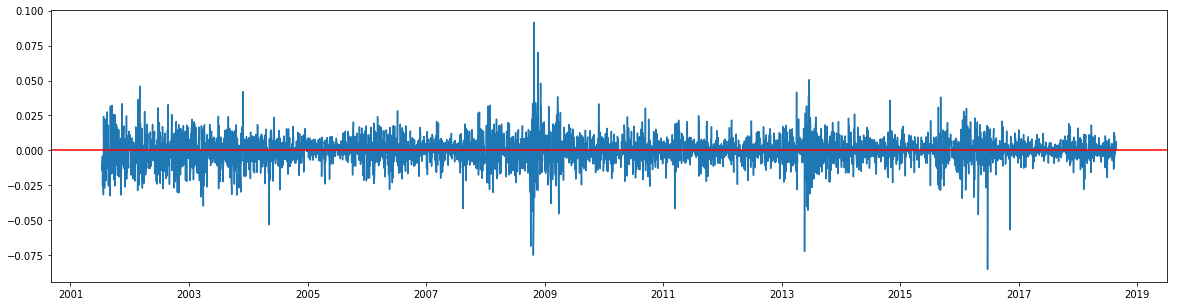

In [22]:
# 差異の比率を描画
plt.figure(figsize=(20,5))
tmp2 = tmp['dif_pct']
plt.plot(tmp2)
plt.axhline(0,c='r')
plt.show()

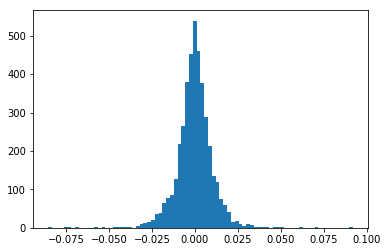

In [23]:
# 比率の分布の可視化

plt.hist(tmp['dif_pct'],bins=80)
plt.show()

In [24]:
# 変化率の統計量を算出
tmp['dif_pct'].describe()

count    4200.000000
mean       -0.000248
std         0.010252
min        -0.085258
25%        -0.005209
50%         0.000000
75%         0.005102
max         0.091667
Name: dif_pct, dtype: float64

C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\localadmin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


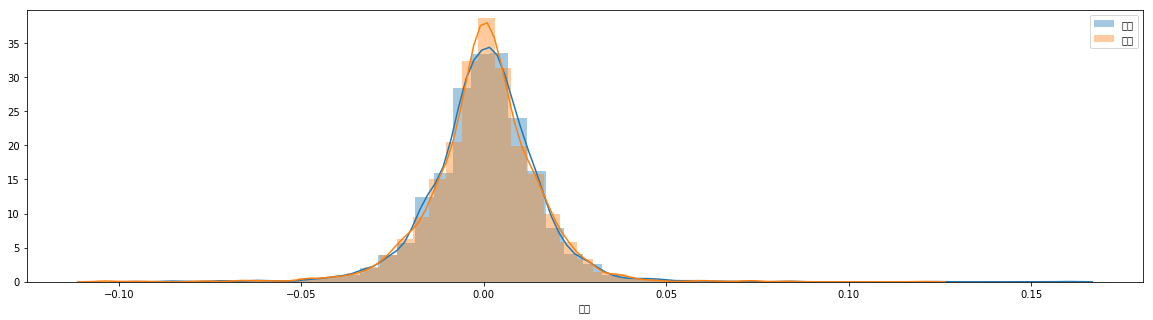

In [25]:
# 始値と終値について対前日比を計算して分布を可視化

plt.figure(figsize=(20,5))
sns.distplot(tmp['始値'].pct_change().dropna(),label='始値')
sns.distplot(tmp['終値'].pct_change().dropna(),label='終値')
plt.legend()
plt.show()

In [26]:
# 自己相関の分析に必要なライブラリをimport
import statsmodels.api as sm

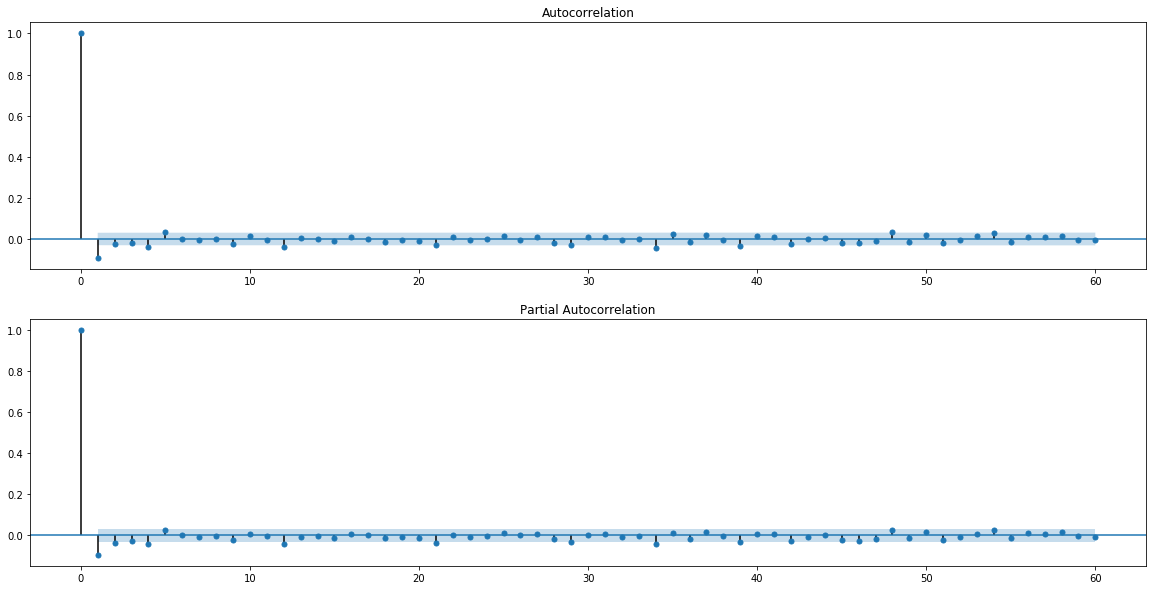

In [27]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
# 自己相関（t期の値がt+n期の値とどの程度相関しているかを示す）
_ = sm.tsa.graphics.plot_acf(tmp['dif_pct'],lags=60,ax=ax1)
# 偏自己相関（他の期の相関を除去して真の相関を示す）
_ = sm.tsa.graphics.plot_pacf(tmp['dif_pct'],lags=60,ax=ax2)

# 高値と安値の可視化

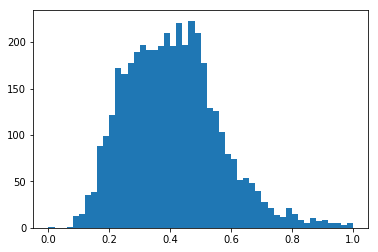

In [28]:
# 始値と終値の差異の分布を表す関数に設定するパラメータを計算する。

MEAN = np.mean(tmp['dif_pct'])   #平均
STD = np.std(tmp['dif_pct'])     #標準偏差

tmp = target.copy()[['安値','高値','始値']]
tmp['高値率'] = (tmp['高値'] / tmp['始値']) -1
tmp['安値率'] = (tmp['安値'] / tmp['始値']) -1

# 正規分布に拠った確率値を計算するライブラリのimport

import scipy.stats as stats

lower = stats.norm.cdf(x=tmp['安値率'],loc=MEAN,scale=STD)  # 安値以下を取る確率
higher = stats.norm.sf(x=tmp['高値率'],loc=MEAN,scale=STD)  # 高値以上を取る確率
tmp2 = 1.0 - (lower+higher)  #高値から安値の範囲を推移する確率

# 結果をヒストグラムにする
plt.hist(tmp2,50)
plt.show()

# 機械学習で株価を予測（階差系列のみ）

In [79]:
#訓練・テストデータの割合
#train_rate = 0.9
#test_rate = 1 - train_rate

# 訓練・テストデータ位置
#train_last_location = int(len(tmp) * train_rate - 1)
#test_first_location = int(train_last_location + 1)
train_last_location = len(tmp)-2
test_first_location = train_last_location + 1

In [124]:
from sklearn.ensemble import RandomForestClassifier

# 訓練データ
#df_train = tmp.iloc[0:train_last_location+1]
#df_train

df_train = tmp.iloc[0:len(tmp)-1]
df_train

,始値,終値,dif
日付,,,
2001-07-13,12490,12310,-180
2001-07-16,12400,12330,-70
2001-07-17,12170,12120,-50
2001-07-18,12150,11840,-310
2001-07-19,11990,11920,-70
2001-07-23,11950,11570,-380
2001-07-24,11560,11840,280
2001-07-25,11750,11860,110
2001-07-26,11940,11830,-110


In [125]:
df_test = tmp.iloc[len(tmp)-1:len(tmp)]
df_test

,始値,終値,dif
日付,,,
2018-08-27,23150,23290,140


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2001-07-13 to 2018-08-24
Data columns (total 3 columns):
始値     4199 non-null int64
終値     4199 non-null int64
dif    4199 non-null int64
dtypes: int64(3)
memory usage: 131.2 KB


In [127]:
x_train = []
y_train = []

for s in range(0, len(df_train)-1):    
    
    x_train.append(df_train.iloc[s])
    
    if df_train['dif'].iloc[s+1] > 0:
        y_train.append(1)
    else:
        y_train.append(-1)
        

In [130]:
x_train

AttributeError: 'list' object has no attribute 'tail'

In [129]:
y_train

[-1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -

In [131]:
rf = RandomForestClassifier(n_estimators=len(x_train), random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4198, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
x_test = []
x_test.append(df_test.iloc[0])
x_test

[始値     23150
 終値     23290
 dif      140
 Name: 2018-08-27 00:00:00, dtype: int64]

In [133]:
rf.predict(x_test)

array([-1])

In [49]:
tmp.head()

,始値,終値,dif
日付,,,
2001-07-13,12490,12310,-180
2001-07-16,12400,12330,-70
2001-07-17,12170,12120,-50
2001-07-18,12150,11840,-310
2001-07-19,11990,11920,-70
